# Modeling the Garden-Ohare-Lake Michigan data (1995-2018)

In this notebook are a plethora of predictive models which all attempt to predict the observed absolute difference in the amount of precipitation between the Garden (near lake michigan) and Ohare (further inland).  The modeling begins [here](#modeling).  There are also several t-tests performed to determine significant differences in the data.  These tests begin [here](#ttesting).

## Model with score
### See an analysis of the results displayed in this table [here](#modelAnalysis).
This table was constructed using the online resource [Tables Generator](https://www.tablesgenerator.com/markdown_tables).

|       Model       | Training score | Testing score | Training MSE | Testing MSE | cross validation |        View        |
|:-----------------:|:--------------:|:-------------:|:------------:|:-----------:|:----------------:|:------------------:|
|   Linear no poly  |     0.0825     |     0.1052    |    0.0933    |    0.0683   |      0.0785      |  [link](#linear1)  |
|     Linear gs     |     0.1222     |     0.1329    |    0.0893    |    0.0662   |      0.0984      |  [link](#linear2)  |
|   Decision Tree   |     0.1139     |     0.0691    |    0.0901    |    0.0711   |      0.0429      | [link](#decision1) |
|  Decision Tree gs |     0.0937     |     0.0584    |    0.0922    |    0.0719   |      0.0450      | [link](#decision2) |
|   Random Forest   |     0.8614     |     0.0517    |    0.0134    |    0.0724   |      0.0554      |  [link](#forest1)  |
|   Random Forest   |     0.8711     |     0.1078    |    0.0131    |    0.0681   |      0.0770      |  [link](#forest2)  |
|  Random Forest gs |     0.8658     |     0.0905    |    0.0136    |    0.0694   |      0.0651      |  [link](#forest3)  |
|   Random Forest   |     0.8677     |     0.0682    |    0.0135    |    0.0711   |      0.0660      |  [link](#forest4)  |
|   Random Forest   |     0.8704     |     0.1153    |    0.0132    |    0.0676   |      0.0767      |  [link](#forest5)  |
|   Random Forest   |     0.8080     |     0.0957    |    0.0195    |    0.0690   |      0.0787      |  [link](#forest6)  |
| Random Forest ada |     0.9547     |     0.0549    |    0.0331    |    0.0722   |      0.0331      |  [link](#forest7)  |
| Random Forest ada |     0.9445     |     0.0525    |    0.0056    |    0.0723   |      0.0283      |  [link](#forest8)  |
| Random Forest bag |     0.6735     |     0.1130    |    0.0332    |    0.0677   |      0.0928      |  [link](#forest9)  |
| Random Forest bag |     0.6705     |     0.1239    |    0.0335    |    0.0669   |      0.0943      |  [link](#forest10) |

Notes:  

 - There are several Regularized Linear models in the notebook that had such poor scores they were excluded from this table.  They can be found [here](#regularizations).
 - There were also some Feed Forward Neural Networks that were trained, but also with considerably poor results.  These can be found [here](#neural).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='ttesting'></a>
## Pulling data, five datasets, to check for significance in average differences.

 - The combined data
 - When it rains at both locations
 - When it does not rain at either location
 - When it rains only at ohare
 - When it rains only at the Garden

## Testing results
### See an analysis of the results displayed in this table [here](#testAnalysis).
This table was constructed using the online resource [Tables Generator](https://www.tablesgenerator.com/markdown_tables).


|     Data    | Quantity of Data | t-score | p-value | significance | Gardens Avg (F) | Ohare Avg (F) |           View          |
|:-----------:|:-------:|:----------------:|:-------:|:------------:|:---------------:|:-------------:|:-----------------------:|
|   All Data  |       7923       |  0.5876 |  0.5568 |     None     |      59.24      |     59.43     |    [link](#fullData)    |
|   No Rain   |       4022       |  3.285  |  0.0010 |      Yes     |      58.99      |     60.57     |   [link](#bothNotRain)  |
|  Both Rain  |       1648       |  -2.629 |  0.0086 |      Yes     |      59.48      |      57.7     |    [link](#bothRain)    |
|  ohareRain  |       1193       | -1.9557 |  0.0506 |     None     |      59.06      |     57.43     |  [link](#ohareRainOnly) |
| gardensRain |       1060       |  0.0904 |  0.9280 |     None     |      59.99      |     60.07     | [link](#gardenRainOnly) |

### The combined data

In [2]:
# Uncorrelated, all the data
data = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_but_clean.csv')

print(data.shape)
print()
print(data.columns)
print()
print(data.dtypes)
data.head()

(7923, 19)

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_medtmp     float64
garden_tobs       float64
lake_temp         float64
ohare_wspd        float64
ohare_prcp        float64
ohare_snfall      float64
ohare_sndpth      float64
ohare_maxtmp        int64
ohare_mintmp        int64
ohare_medtmp      float64
dtype: object


target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  garden_snfall  \
0    0.09               1              1      9.5         0.11            1.5   
1    0.00               0              0      1.0         0.00            0.0   
2    0.00               0              0      7.0         0.00            0.0   
3    0.00               0              0      5.5         0.00            0.0   
4    0.00               0              0      6.5         0.00            0.0   

   garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  garden_tobs  \
0            3.0           36.0           21.0           28.5         24.0   
1            1.0           24.0            7.0           15.5         12.0   
2            1.0           25.0           10.0           17.5         11.0   
3            1.0           18.0           -1.0            8.5          1.0   
4            1.0            6.0           -1.0            2.5          3.0   

   lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0       5.02       16.11        0.02           0.2           1.0   
1       4.95       14.09        0.00           0.0           1.0   
2       0.20       12.53        0.00           0.0           1.0   
3       0.20       12.30        0.00           0.0           1.0   
4       0.20       16.33        0.00           0.0           0.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            27            11          19.0  
1            21             8          14.5  
2            18             3          10.5  
3             7            -1           3.0  
4            19            -1           9.0

### Both raining

In [3]:
# Uncorrelated, both rain
data_both_rain = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_both_rain.csv')

print(data_both_rain.shape)
print()
print(data_both_rain.columns)
print()
print(data_both_rain.dtypes)
data_both_rain.head()

(1648, 19)

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_medtmp     float64
garden_tobs       float64
lake_temp         float64
ohare_wspd        float64
ohare_prcp        float64
ohare_snfall      float64
ohare_sndpth      float64
ohare_maxtmp        int64
ohare_mintmp        int64
ohare_medtmp      float64
dtype: object


target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  garden_snfall  \
0    0.09               1              1      9.5         0.11            1.5   
1    0.22               1              1      9.0         0.03            0.3   
2    0.82               1              1      4.5         0.02            0.0   
3    1.14               1              1      2.5         1.94            0.0   
4    0.63               1              1      0.0         0.18            0.8   

   garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  garden_tobs  \
0            3.0           36.0           21.0           28.5         24.0   
1            1.0           24.0            3.0           13.5         24.0   
2            0.0           48.0           32.0           40.0         33.0   
3            0.0           37.0           32.0           34.5         36.0   
4            1.0           39.0           29.0           34.0         35.0   

   lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0       5.02       16.11        0.02           0.2           1.0   
1       0.20       10.51        0.25           3.3           1.0   
2       3.63        9.40        0.84           0.0           0.0   
3       3.52       17.00        0.80           0.0           0.0   
4       3.03       19.01        0.81           2.4           1.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            27            11          19.0  
1            27            18          22.5  
2            38            33          35.5  
3            39            35          37.0  
4            36            32          34.0

### Data, both not raining

In [4]:
# Uncorrelated, both rain
data_both_not_rain = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_both_not_rain.csv')

print(data_both_not_rain.shape)
print()
print(data_both_not_rain.columns)
print()
print(data_both_not_rain.dtypes)
data_both_not_rain.head()

(4022, 19)

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_medtmp     float64
garden_tobs       float64
lake_temp         float64
ohare_wspd        float64
ohare_prcp        float64
ohare_snfall      float64
ohare_sndpth      float64
ohare_maxtmp        int64
ohare_mintmp        int64
ohare_medtmp      float64
dtype: object


target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  garden_snfall  \
0     0.0               0              0      1.0          0.0            0.0   
1     0.0               0              0      7.0          0.0            0.0   
2     0.0               0              0      5.5          0.0            0.0   
3     0.0               0              0      6.5          0.0            0.0   
4     0.0               0              0      5.5          0.0            0.0   

   garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  garden_tobs  \
0            1.0           24.0            7.0           15.5         12.0   
1            1.0           25.0           10.0           17.5         11.0   
2            1.0           18.0           -1.0            8.5          1.0   
3            1.0            6.0           -1.0            2.5          3.0   
4            3.0           28.0            6.0           17.0          9.0   

   lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0       4.95       14.09         0.0           0.0           1.0   
1       0.20       12.53         0.0           0.0           1.0   
2       0.20       12.30         0.0           0.0           1.0   
3       0.20       16.33         0.0           0.0           0.0   
4       0.20        8.50         0.0           0.0           3.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            21             8          14.5  
1            18             3          10.5  
2             7            -1           3.0  
3            19            -1           9.0  
4            19             4          11.5

### Data, rain only at Ohare

In [5]:
# Uncorrelated, both rain
data_ohareRainOnly = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_ohareRain_gardenNotRain.csv')

print(data_ohareRainOnly.shape)
print()
print(data_ohareRainOnly.columns)
print()
print(data_ohareRainOnly.dtypes)
data_ohareRainOnly.head()

(1193, 19)

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_medtmp     float64
garden_tobs       float64
lake_temp         float64
ohare_wspd        float64
ohare_prcp        float64
ohare_snfall      float64
ohare_sndpth      float64
ohare_maxtmp        int64
ohare_mintmp        int64
ohare_medtmp      float64
dtype: object


target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  garden_snfall  \
0    0.01               1              0      3.0         0.01            2.0   
1    0.17               1              0      4.0         0.17            1.8   
2    0.14               1              0      2.5         0.14            0.0   
3    0.90               1              0      3.5         0.90            0.0   
4    0.11               1              0      0.5         0.11            1.5   

   garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  garden_tobs  \
0            3.0           26.0           19.0           22.5         20.0   
1            4.0           23.0           14.0           18.5         22.0   
2            0.0           39.0           32.0           35.5         33.0   
3            0.0           37.0           29.0           33.0         30.0   
4            4.0           24.0           15.0           19.5         17.0   

   lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0       0.20       12.30         0.0           0.0           3.0   
1       3.97        7.38         0.0           0.0           4.0   
2       3.41       12.53         0.0           0.0           0.0   
3       2.93       17.67         0.0           0.0           0.0   
4       2.67        9.40         0.0           0.0           3.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            27            12          19.5  
1            29            16          22.5  
2            36            30          33.0  
3            33            26          29.5  
4            26            14          20.0

### Data, rain only at the gardens

In [6]:
# Uncorrelated, both rain
data_gardenRainOnly = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_gardenRain_ohareNotRain.csv')

print(data_gardenRainOnly.shape)
print()
print(data_gardenRainOnly.columns)
print()
print(data_gardenRainOnly.dtypes)
data_gardenRainOnly.head()

(1060, 19)

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_medtmp     float64
garden_tobs       float64
lake_temp         float64
ohare_wspd        float64
ohare_prcp        float64
ohare_snfall      float64
ohare_sndpth      float64
ohare_maxtmp        int64
ohare_mintmp        int64
ohare_medtmp      float64
dtype: object


target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  garden_snfall  \
0    0.11               0              1      4.5          0.0            0.0   
1    0.01               0              1      4.5          0.0            0.0   
2    0.08               0              1      1.5          0.0            0.0   
3    0.02               0              1      1.5          0.0            0.0   
4    0.01               0              1      3.0          0.0            0.0   

   garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  garden_tobs  \
0            2.0           20.0            8.0           14.0         15.0   
1            4.0           34.0           22.0           28.0         34.0   
2            2.0           34.0           10.0           22.0         20.0   
3            0.0           35.0           29.0           32.0         32.0   
4            0.0           49.0           26.0           37.5         35.0   

   lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0       4.10        7.38        0.11           1.9           3.0   
1       3.86        5.59        0.01           0.0           4.0   
2       2.39        8.95        0.08           0.8           2.0   
3       1.99        9.17        0.02           0.4           0.0   
4       2.04       13.20        0.01           0.0           0.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            25            12          18.5  
1            40            25          32.5  
2            34            13          23.5  
3            35            26          30.5  
4            51            30          40.5

# We begin by running some t-tests to check for potential significant differences between the garden and ohare.

In [7]:
import scipy.stats as stats

# Temperature

#### Note, there is a statistically significant difference between the max temperatures when the whether is similar at both locations.

<a id='fullData'></a>
# Max temperatures, full dataset
### There is no statistically significant difference present between the mean max temperatures of the two locations

In [8]:
stats.ttest_ind(data.ohare_maxtmp, data.garden_maxtmp)

Ttest_indResult(statistic=0.5875989949892636, pvalue=0.5568098596678298)

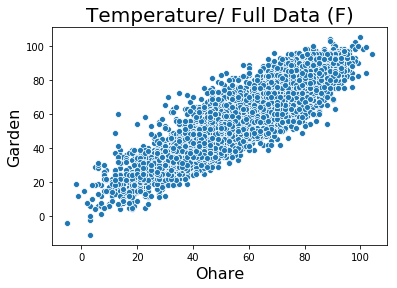

In [10]:
sns.scatterplot(data.ohare_maxtmp, data.garden_maxtmp);
plt.title('Temperature/ Full Data (F)', size=20);
plt.xlabel('Ohare', size=16)
plt.ylabel('Garden', size=16);

In [11]:
print(f"The average maximum temperature at Ohare on days when there was rain: {round(data['ohare_maxtmp'].mean(), 2)} degrees F.")
print(f"The average maximum temperature at the Garden on days when there was rain: {round(data['garden_maxtmp'].mean(), 2)} degrees F.")
      
      

The average maximum temperature at Ohare on days when there was rain: 59.43 degrees F.
The average maximum temperature at the Garden on days when there was rain: 59.24 degrees F.


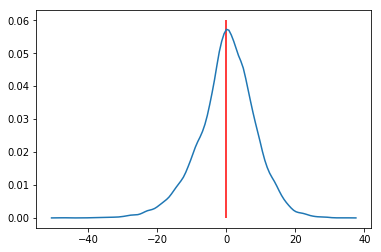

In [12]:
# kde/pdf of the difference between the two locations
sns.kdeplot(data.ohare_maxtmp - data.garden_maxtmp);
plt.vlines(x=0, ymax=0.06, ymin=0, colors='r')

In [13]:
t_stat, p_value = stats.ttest_ind(data.ohare_maxtmp, data.garden_maxtmp)
t_stat, p_value

(0.5875989949892636, 0.5568098596678298)

In [14]:
# #sample sizes
n_ohare = len(data.ohare_maxtmp)
n_garden = len(data.garden_maxtmp)

# # calculate area in the tails using cdf
lower_tail = stats.t.cdf(-abs(t_stat), (n_ohare + n_garden - 2))    
upper_tail = 1 - stats.t.cdf(abs(t_stat), (n_ohare + n_garden -2))            

# #calculate p-value
p_value_manual = lower_tail + upper_tail

# #print out tails and pvalues

print(lower_tail)
print(upper_tail)
print(p_value_manual)
print(p_value)


0.2784049298339149
0.27840492983391485
0.5568098596678297
0.5568098596678298


In [15]:
# Generate points on the x axis between -45 and 45:
xpoints = np.linspace(-2, 2, 30)  #(min, max, how many steps in between)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (n_ohare + n_garden -2), 0, 1)     
#probability density function, then the points we want to pass in, the mean and the std, and ddof

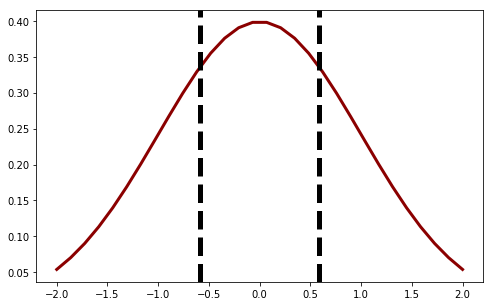

In [16]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5);

#### Since the p-value falls within the interval where t is not zero, we have no statistically significant reason to reject the null hypothesis.  Thus, the means are the same, in the case of the full dataset.

<a id='bothRain'></a>
# Max temperatures, both raining
### There is a statistically significant difference present between the mean max temperatures of the two locations when there is precipitation at both locations during the day.

In [17]:
stats.ttest_ind(data_both_rain.ohare_maxtmp, data_both_rain.garden_maxtmp)

Ttest_indResult(statistic=-2.629078013403157, pvalue=0.008601459111375994)

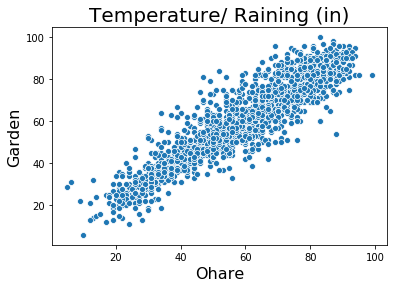

In [18]:
sns.scatterplot(data_both_rain.ohare_maxtmp, data_both_rain.garden_maxtmp);
plt.title('Temperature/ Raining (in)', size=20);
plt.xlabel('Ohare', size=16)
plt.ylabel('Garden', size=16);

In [19]:
print(f"The average maximum temperature at Ohare on days when there was rain: {round(data_both_rain['ohare_maxtmp'].mean(), 2)} degrees F.")
print(f"The average maximum temperature at the Garden on days when there was rain: {round(data_both_rain['garden_maxtmp'].mean(), 2)} degrees F.")
      
      

The average maximum temperature at Ohare on days when there was rain: 57.7 degrees F.
The average maximum temperature at the Garden on days when there was rain: 59.48 degrees F.


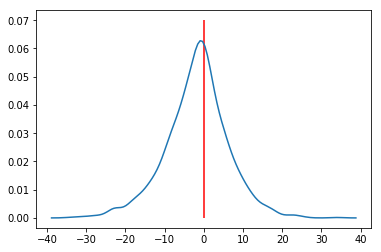

In [20]:
# kde/pdf of the difference between the two locations
sns.kdeplot(data_both_rain.ohare_maxtmp - data_both_rain.garden_maxtmp);
plt.vlines(x=0, ymax=0.07, ymin=0, colors='r');

In [21]:
t_stat, p_value = stats.ttest_ind(data_both_rain.ohare_maxtmp, data_both_rain.garden_maxtmp)
t_stat, p_value

(-2.629078013403157, 0.008601459111375994)

In [22]:
# #sample sizes
n_ohare = len(data_both_rain.ohare_maxtmp)
n_garden = len(data_both_rain.garden_maxtmp)

# # calculate area in the tails using cdf
lower_tail = stats.t.cdf(-abs(t_stat), (n_ohare + n_garden - 2))    
upper_tail = 1 - stats.t.cdf(abs(t_stat), (n_ohare + n_garden -2))            

# #calculate p-value
p_value_manual = lower_tail + upper_tail

# #print out tails and pvalues

print(lower_tail)
print(upper_tail)
print(p_value_manual)
print(p_value)


0.004300729555687997
0.004300729555688054
0.008601459111376051
0.008601459111375994


In [23]:
# Generate points on the x axis between -45 and 45:
xpoints = np.linspace(-8, 8, 30)  #(min, max, how many steps in between)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (n_ohare + n_garden -2), 0, 1)     
#probability density function, then the points we want to pass in, the mean and the std, and ddof

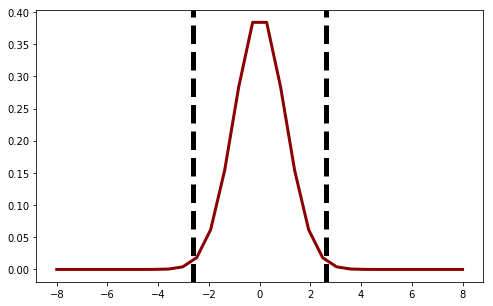

In [24]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5);

<a id='bothNotRain'></a>
# Max temperatures, both not raining
### There is a statistically significant difference present between the mean max temperatures of the two locations when there is not precipitation at either locations during the day.

In [25]:
stats.ttest_ind(data_both_not_rain.ohare_maxtmp, data_both_not_rain.garden_maxtmp)

Ttest_indResult(statistic=3.2850453166245197, pvalue=0.0010240231591212275)

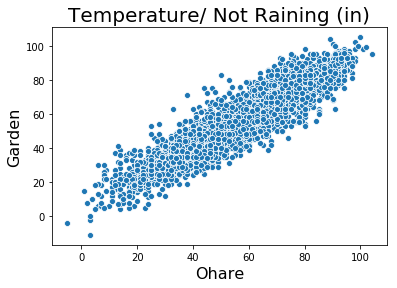

In [26]:
sns.scatterplot(data_both_not_rain.ohare_maxtmp, data_both_not_rain.garden_maxtmp);
plt.title('Temperature/ Not Raining (in)', size=20);
plt.xlabel('Ohare', size=16)
plt.ylabel('Garden', size=16);

In [27]:
print(f"The average maximum temperature at Ohare on days when there was no rain: {round(data_both_not_rain['ohare_maxtmp'].mean(), 2)} degrees F.")
print(f"The average maximum temperature at the Garden on days when there was no rain: {round(data_both_not_rain['garden_maxtmp'].mean(), 2)} degrees F.")
      
      

The average maximum temperature at Ohare on days when there was no rain: 60.57 degrees F.
The average maximum temperature at the Garden on days when there was no rain: 58.99 degrees F.


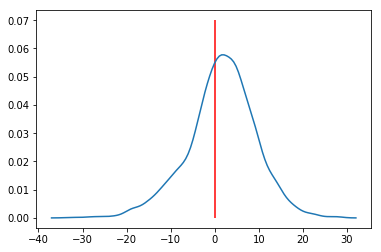

In [28]:
# kde/pdf of the difference between the two locations
sns.kdeplot(data_both_not_rain.ohare_maxtmp - data_both_not_rain.garden_maxtmp);
plt.vlines(x=0, ymax=0.07, ymin=0, colors='r');

In [53]:
t_stat, p_value = stats.ttest_ind(data_both_not_rain.ohare_maxtmp, data_both_not_rain.garden_maxtmp)
t_stat, p_value

(3.2850453166245197, 0.0010240231591212275)

In [54]:
# #sample sizes
n_ohare = len(data_both_not_rain.ohare_maxtmp)
n_garden = len(data_both_not_rain.garden_maxtmp)

# # calculate area in the tails using cdf
lower_tail = stats.t.cdf(-abs(t_stat), (n_ohare + n_garden - 2))    
upper_tail = 1 - stats.t.cdf(abs(t_stat), (n_ohare + n_garden -2))            

# #calculate p-value
p_value_manual = lower_tail + upper_tail

# #print out tails and pvalues

print(lower_tail)
print(upper_tail)
print(p_value_manual)
print(p_value)


0.0005120115795606137
0.0005120115795606006
0.0010240231591212142
0.0010240231591212275


In [57]:
# Generate points on the x axis between -45 and 45:
xpoints = np.linspace(-6, 6, 30)  #(min, max, how many steps in between)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (n_ohare + n_garden -2), 0, 1)     
#probability density function, then the points we want to pass in, the mean and the std, and ddof

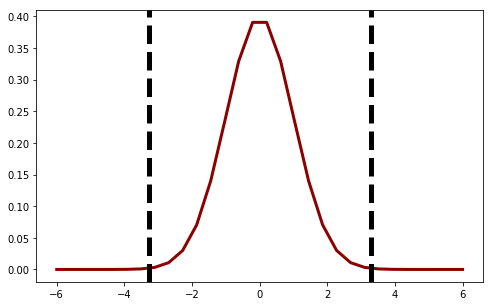

In [58]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5);

<a id='gardenRainOnly'></a>
# Max temperatures, no rain at Ohare
### There is no statistically significant difference present between the mean max temperatures of the two locations when there is only precipitation at the gardens.  Here, the average temperatures are almost identical.

In [69]:
stats.ttest_ind(data_gardenRainOnly.ohare_maxtmp, data_gardenRainOnly.garden_maxtmp)

Ttest_indResult(statistic=0.0904338466658627, pvalue=0.9279510122019925)

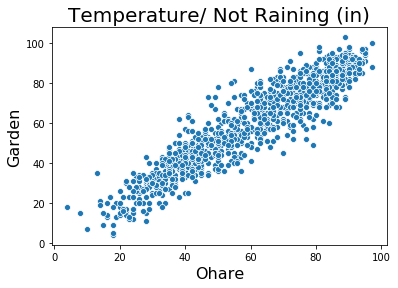

In [71]:
sns.scatterplot(data_gardenRainOnly.ohare_maxtmp, data_gardenRainOnly.garden_maxtmp);
plt.title('Temperature/ Not Raining (in)', size=20);
plt.xlabel('Ohare', size=16)
plt.ylabel('Garden', size=16);

In [72]:
print(f"The average maximum temperature at Ohare on days when there was no rain: {round(data_gardenRainOnly['ohare_maxtmp'].mean(), 2)} degrees F.")
print(f"The average maximum temperature at the Garden on days when there was no rain: {round(data_gardenRainOnly['garden_maxtmp'].mean(), 2)} degrees F.")
      
      

The average maximum temperature at Ohare on days when there was no rain: 60.07 degrees F.
The average maximum temperature at the Garden on days when there was no rain: 59.99 degrees F.


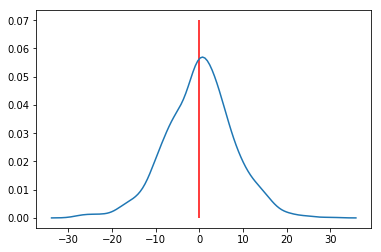

In [73]:
# kde/pdf of the difference between the two locations
sns.kdeplot(data_gardenRainOnly.ohare_maxtmp - data_gardenRainOnly.garden_maxtmp);
plt.vlines(x=0, ymax=0.07, ymin=0, colors='r');

In [74]:
t_stat, p_value = stats.ttest_ind(data_gardenRainOnly.ohare_maxtmp, data_gardenRainOnly.garden_maxtmp)
t_stat, p_value

(0.0904338466658627, 0.9279510122019925)

In [75]:
# #sample sizes
n_ohare = len(data_gardenRainOnly.ohare_maxtmp)
n_garden = len(data_gardenRainOnly.garden_maxtmp)

# # calculate area in the tails using cdf
lower_tail = stats.t.cdf(-abs(t_stat), (n_ohare + n_garden - 2))    
upper_tail = 1 - stats.t.cdf(abs(t_stat), (n_ohare + n_garden -2))            

# #calculate p-value
p_value_manual = lower_tail + upper_tail

# #print out tails and pvalues

print(lower_tail)
print(upper_tail)
print(p_value_manual)
print(p_value)


0.46397550610099625
0.46397550610099625
0.9279510122019925
0.9279510122019925


In [78]:
# Generate points on the x axis between -45 and 45:
xpoints = np.linspace(-1, 1, 30)  #(min, max, how many steps in between)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (n_ohare + n_garden -2), 0, 1)     
#probability density function, then the points we want to pass in, the mean and the std, and ddof

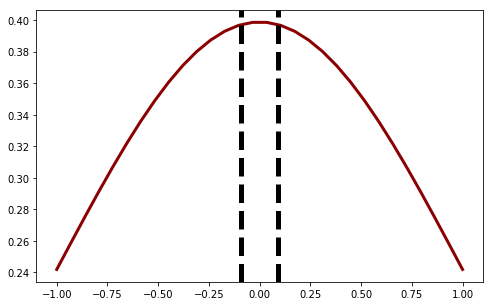

In [79]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5);

<a id='ohareRainOnly'></a>
# Max temperatures, no rain at the gardens
### There is no statistically significant difference present between the mean max temperatures of the two locations when there is only precipitation at ohare, although the means are very similar over all days when it rained at ohare but not at the gardens.

In [59]:
stats.ttest_ind(data_ohareRainOnly.ohare_maxtmp, data_ohareRainOnly.garden_maxtmp)

Ttest_indResult(statistic=-1.9557314383121636, pvalue=0.05061344654751619)

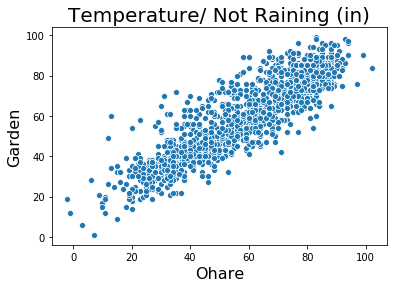

In [60]:
sns.scatterplot(data_ohareRainOnly.ohare_maxtmp, data_ohareRainOnly.garden_maxtmp);
plt.title('Temperature/ Not Raining (in)', size=20);
plt.xlabel('Ohare', size=16)
plt.ylabel('Garden', size=16);

In [61]:
print(f"The average maximum temperature at Ohare on days when there was no rain: {round(data_ohareRainOnly['ohare_maxtmp'].mean(), 2)} degrees F.")
print(f"The average maximum temperature at the Garden on days when there was no rain: {round(data_ohareRainOnly['garden_maxtmp'].mean(), 2)} degrees F.")
      
      

The average maximum temperature at Ohare on days when there was no rain: 57.43 degrees F.
The average maximum temperature at the Garden on days when there was no rain: 59.06 degrees F.


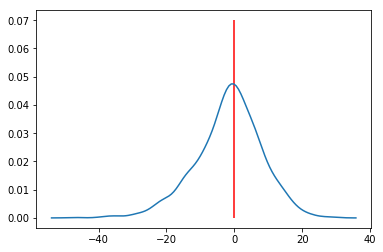

In [62]:
# kde/pdf of the difference between the two locations
sns.kdeplot(data_ohareRainOnly.ohare_maxtmp - data_ohareRainOnly.garden_maxtmp);
plt.vlines(x=0, ymax=0.07, ymin=0, colors='r');

In [63]:
t_stat, p_value = stats.ttest_ind(data_ohareRainOnly.ohare_maxtmp, data_ohareRainOnly.garden_maxtmp)
t_stat, p_value

(-1.9557314383121636, 0.05061344654751619)

In [64]:
# #sample sizes
n_ohare = len(data_ohareRainOnly.ohare_maxtmp)
n_garden = len(data_ohareRainOnly.garden_maxtmp)

# # calculate area in the tails using cdf
lower_tail = stats.t.cdf(-abs(t_stat), (n_ohare + n_garden - 2))    
upper_tail = 1 - stats.t.cdf(abs(t_stat), (n_ohare + n_garden -2))            

# #calculate p-value
p_value_manual = lower_tail + upper_tail

# #print out tails and pvalues

print(lower_tail)
print(upper_tail)
print(p_value_manual)
print(p_value)


0.025306723273758096
0.025306723273758158
0.050613446547516254
0.05061344654751619


In [67]:
# Generate points on the x axis between -45 and 45:
xpoints = np.linspace(-4, 4, 30)  #(min, max, how many steps in between)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (n_ohare + n_garden -2), 0, 1)     
#probability density function, then the points we want to pass in, the mean and the std, and ddof

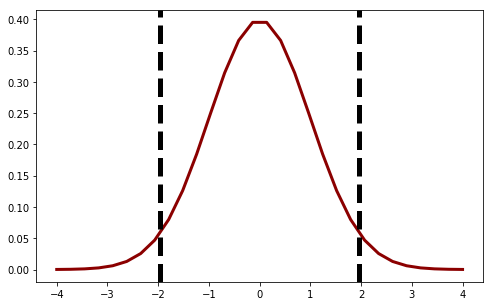

In [68]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5);

## Precipitation

In [14]:
# precipitation, full data
stats.ttest_ind(data.ohare_prcp, data.garden_prcp)

Ttest_indResult(statistic=-0.9356247321324567, pvalue=0.34948069590263486)

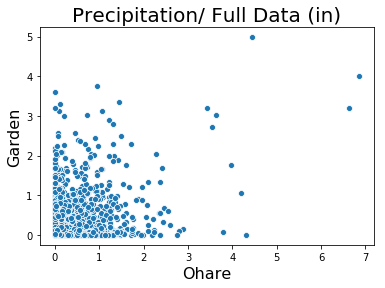

In [15]:
sns.scatterplot(data.ohare_prcp, data.garden_prcp);
plt.title('Precipitation/ Full Data (in)', size=20);
plt.xlabel('Ohare', size=16)
plt.ylabel('Garden', size=16);

In [16]:
# precipitation, both raining
stats.ttest_ind(data_both_rain.ohare_prcp, data_both_rain.garden_prcp)

Ttest_indResult(statistic=-1.2185034953971952, pvalue=0.2231199584735155)

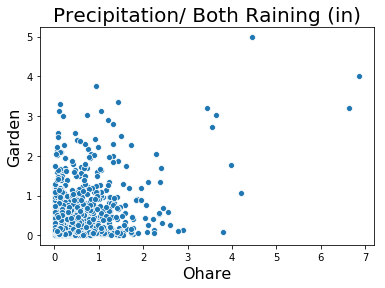

In [17]:
sns.scatterplot(data_both_rain.ohare_prcp, data_both_rain.garden_prcp);
plt.title('Precipitation/ Both Raining (in)', size=20);
plt.xlabel('Ohare', size=16)
plt.ylabel('Garden', size=16);

#### These are both large p-values, indicating that there is no reason, based on the given data, to think there is a statistically significant difference in average precipitation between the two locations.

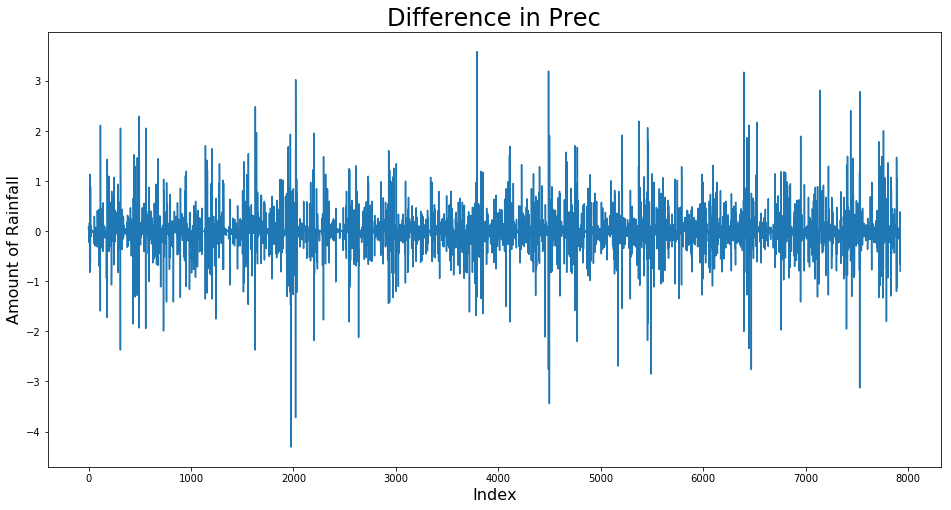

In [18]:
plt.figure(figsize=(16, 8))

plt.plot((data.garden_prcp - data.ohare_prcp))
plt.title('Difference in Prec', size=24)
plt.xlabel('Index', size=16)
plt.ylabel('Amount of Rainfall', size=16);

### Comparing the difference between the temperature difference and Lake Michigan temperature.

In [22]:
stats.ttest_ind(data.target, data.lake_temp)

Ttest_indResult(statistic=-117.44188661377726, pvalue=0.0)

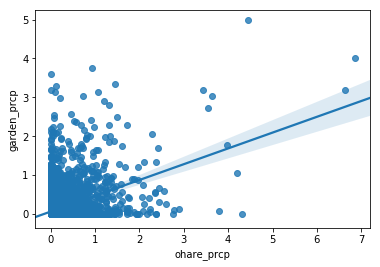

In [23]:
sns.regplot(data.ohare_prcp, data.garden_prcp);

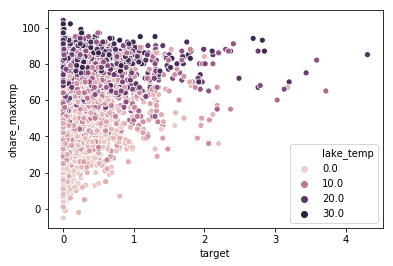

In [24]:
sns.scatterplot(data.target, data.ohare_maxtmp, data.lake_temp);

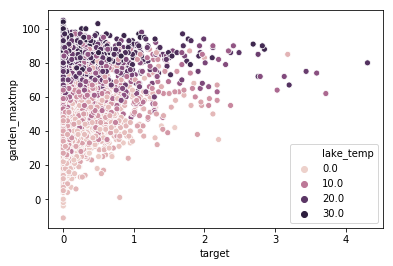

In [25]:
sns.scatterplot(data.target, data.garden_maxtmp, data.lake_temp);

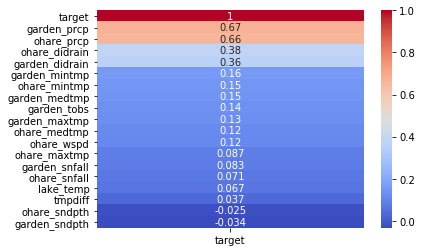

In [26]:
# this will generate a single column heatmap showing the correlations between the target and the remaining variables

# need a dataframe called data and a column called 'status'
corr = data.corr()
corr_sort = corr.sort_values(by = ['target'], axis = 0, ascending=False)
corr_sort
sns.heatmap(corr_sort[['target']], annot=True, cmap='coolwarm');

In [27]:
data.columns

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

In [28]:
# Now, remove all of the unnecessary columns
data = data.drop(columns=['garden_didrain', 'ohare_didrain', 'garden_prcp', 'ohare_prcp'])

print(data.shape)
print()
print(data.columns)
print()
print(data.dtypes)
data.head()

(7923, 15)

Index(['target', 'tmpdiff', 'garden_snfall', 'garden_sndpth', 'garden_maxtmp',
       'garden_mintmp', 'garden_medtmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp',
       'ohare_mintmp', 'ohare_medtmp'],
      dtype='object')

target           float64
tmpdiff          float64
garden_snfall    float64
garden_sndpth    float64
garden_maxtmp    float64
garden_mintmp    float64
garden_medtmp    float64
garden_tobs      float64
lake_temp        float64
ohare_wspd       float64
ohare_snfall     float64
ohare_sndpth     float64
ohare_maxtmp       int64
ohare_mintmp       int64
ohare_medtmp     float64
dtype: object


target  tmpdiff  garden_snfall  garden_sndpth  garden_maxtmp  \
0    0.09      9.5            1.5            3.0           36.0   
1    0.00      1.0            0.0            1.0           24.0   
2    0.00      7.0            0.0            1.0           25.0   
3    0.00      5.5            0.0            1.0           18.0   
4    0.00      6.5            0.0            1.0            6.0   

   garden_mintmp  garden_medtmp  garden_tobs  lake_temp  ohare_wspd  \
0           21.0           28.5         24.0       5.02       16.11   
1            7.0           15.5         12.0       4.95       14.09   
2           10.0           17.5         11.0       0.20       12.53   
3           -1.0            8.5          1.0       0.20       12.30   
4           -1.0            2.5          3.0       0.20       16.33   

   ohare_snfall  ohare_sndpth  ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0           0.2           1.0            27            11          19.0  
1           0.0           1.0            21             8          14.5  
2           0.0           1.0            18             3          10.5  
3           0.0           1.0             7            -1           3.0  
4           0.0           0.0            19            -1           9.0

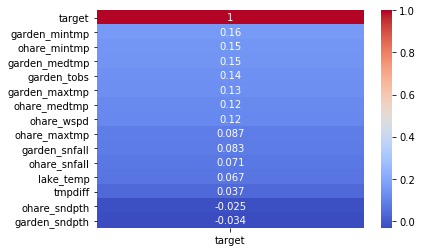

In [29]:
corr = data.corr()
corr_sort = corr.sort_values(by = ['target'], axis = 0, ascending=False)
corr_sort
sns.heatmap(corr_sort[['target']], annot=True, cmap='coolwarm');

In [30]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor

<a id='modeling'></a>
# Modeling

### Create our `feature` and `target` variables for modeling, using the full data set.

In [31]:
X = data.drop(columns='target')
y = data['target']

X.shape

(7923, 14)

In [32]:
y.min()

0.0

In [33]:
y.max()

4.31

In [34]:
y.value_counts()

0.00    4093
0.01     401
0.02     264
0.03     222
0.05     134
0.04     127
0.06     107
0.07      87
0.08      85
0.11      77
0.10      77
0.12      74
0.09      72
0.13      70
0.14      52
0.20      51
0.16      49
0.19      46
0.25      43
0.15      40
0.24      39
0.23      35
0.21      35
0.18      34
0.22      33
0.34      32
0.26      31
0.31      30
0.27      28
0.17      25
        ... 
1.79       1
1.90       1
0.07       1
0.08       1
3.59       1
3.44       1
0.61       1
1.59       1
0.10       1
3.18       1
0.25       1
1.58       1
0.53       1
3.13       1
0.13       1
0.02       1
0.99       1
1.18       1
3.20       1
1.96       1
0.72       1
0.88       1
1.05       1
0.83       1
1.91       1
1.53       1
0.64       1
1.33       1
1.92       1
0.61       1
Name: target, Length: 339, dtype: int64

## Train/ Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

<a id='linear1'></a>
# Generate a Linear Model

In [36]:
# generate a linear model
lm = LinearRegression()

In [37]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
preds = lm.predict(X_train)
preds

array([ 0.13749012, -0.07643048,  0.18582996, ..., -0.05251232,
        0.09391102,  0.00415119])

In [39]:
mean_squared_error(y_train, preds)

0.09330136238880786

In [40]:
lm.score(X_train, y_train)

0.08245567744681348

In [41]:
lm.score(X_test, y_test)

0.1051645456010546

In [42]:
preds = lm.predict(X_test)
preds

array([-0.03902355, -0.03044811,  0.10697254, ...,  0.20243152,
        0.27030262,  0.19449695])

In [43]:
mean_squared_error(y_test, preds)

0.0683234398484013

In [44]:
cross_val_score(lm, X_train, y_train, cv=3).mean()

0.07852580804819927

In [45]:
lm.intercept_

-0.020102655750378673

In [46]:
lm.coef_

array([ 5.46011325e-03,  4.02331235e-02, -2.60436379e-04,  8.18797520e+09,
        8.18797520e+09, -1.63759504e+10, -6.76503823e-04, -3.80692969e-03,
        7.16322668e-03,  1.76644316e-02,  3.36992250e-03, -4.20960542e+09,
       -4.20960542e+09,  8.41921084e+09])

In [47]:
X.columns

Index(['tmpdiff', 'garden_snfall', 'garden_sndpth', 'garden_maxtmp',
       'garden_mintmp', 'garden_medtmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp',
       'ohare_mintmp', 'ohare_medtmp'],
      dtype='object')

<a id='linear2'></a>
## Let's gridsearch and include polynomial features

In [35]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])

poly_params = {
    'poly__degree': [1, 2, 3, 4, 5],
    'poly__interaction_only':[False],
    'poly__include_bias':[True]
}

gs_poly = GridSearchCV(
                    pipe,
                    param_grid=poly_params,
                    cv=3,
                    verbose=1
                )

gs_poly.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.7min finished
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'poly__degree': [1, 2, 3, 4, 5], 'poly__interaction_only': [False], 'poly__include_bias': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [36]:
gs_poly.best_params_

{'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False}

In [37]:
gs_poly.best_score_

0.09836865815627213

In [39]:
# training score
gs_poly.score(X_train, y_train)

0.12215572694908305

In [40]:
# testing score
gs_poly.score(X_test, y_test)

0.13288793431803958

### We are a bit over fit, and not accounting for much of the variance with our model thus far.

In [43]:
# predictions (training)
train_predictions = gs_poly.predict(X_train)

In [44]:
mean_squared_error(y_train, train_predictions)

0.08926442530095388

In [45]:
# predictions (testing)
test_predictions = gs_poly.predict(X_test)

In [46]:
mean_squared_error(y_test, test_predictions)

0.06620667383059617

# Since we have a weak learner, we will incorporate polynomial features and attempt to boost the score with an AdaBoost model.

<a id='poly'></a>
## Polynomial Features

In [37]:
poly = PolynomialFeatures(degree=2)

In [38]:
X_train_poly_array = poly.fit_transform(X_train)

In [39]:
X_train_poly_df = pd.DataFrame(X_train_poly_array)
print(X_train_poly_df.shape)
X_train_poly_df.head()

(5942, 120)


0    1    2     3     4     5     6     7      8      9    ...    110  \
0  1.0  3.5  0.0   0.0  84.0  65.0  74.5  78.0  21.27   6.04  ...   0.00   
1  1.0  3.0  0.0   1.0   7.0  -8.0  -0.5   1.0   1.46   6.04  ...   0.00   
2  1.0  5.0  0.0   0.0  33.0  21.0  27.0  22.0   3.64  13.42  ...   0.00   
3  1.0  6.0  0.0   0.0  55.0  34.0  44.5  48.0   3.63   4.47  ...   0.00   
4  1.0  4.5  0.0  13.0  32.0  11.0  21.5  13.0   0.37   9.84  ...  82.81   

     111    112    113     114     115     116     117     118      119  
0    0.0    0.0    0.0  8100.0  5940.0  7020.0  4356.0  5148.0  6084.00  
1    0.0   -0.0    0.0   100.0   -50.0    25.0    25.0   -12.5     6.25  
2    0.0    0.0    0.0   625.0   475.0   550.0   361.0   418.0   484.00  
3    0.0    0.0    0.0  3844.0  2418.0  3131.0  1521.0  1969.5  2550.25  
4  200.2  109.2  154.7   484.0   264.0   374.0   144.0   204.0   289.00  

[5 rows x 120 columns]

## AdaBoost

In [67]:
# using the default decision stump
ada = AdaBoostRegressor()  # we are not limited to only decision trees with this model 'base_estimator' max_depth=1 is high bias
                            # we are not limited to the number of 

ada_params = {
    'base_estimator': [None],
    'n_estimators': [40, 50, 60]
}

gs = GridSearchCV(ada, param_grid=ada_params, cv=3)
gs.fit(X_train_poly_df, y_train)
print(gs.best_score_)
gs.best_params_

-1.2221022818018292


{'base_estimator': None, 'n_estimators': 40}

### AdaBoost didn't help at all!

<a id='regularizations'></a>
### Now, we try several iterations of regularization using Lasso and Ridge, along side Ordinary Linear Models.  None of them are worth mentioning, but are included here for completeness.

In [31]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()



lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

print(f'LRM train: {lr.score(X_train_scaled, y_train)}')
print(f'LRM test: {lr.score(X_test_scaled, y_test)}')
print(f'percent difference relative to training data: { round(100* (lr.score(X_train_scaled, y_train) - (lr.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)}%' )
print()

print(f'Lasso train: {lasso.score(X_train_scaled, y_train)}')
print(f'Lasso test: {lasso.score(X_test_scaled, y_test)}')
print(f'percent difference relative to training data: { round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)}%' )
print()

print(f'Ridge train: {ridge.score(X_train_scaled, y_train)}')
print(f'Ridge test: {ridge.score(X_test_scaled, y_test)}')
print(f'percent difference relative to training data: { round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)}%' )

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


LRM train: 0.0627513677279058
LRM test: 0.08450829784686775
percent difference relative to training data: -34.672%

Lasso train: 0.0
Lasso test: -0.0006548825984520334
percent difference relative to training data: 1.044%

Ridge train: 0.06274982967202725
Ridge test: 0.08447905245887066
percent difference relative to training data: -34.627%


Model     train      test  percent_difference
0    LRM  0.062751  0.084508             -34.672
2  Ridge  0.062750  0.084479             -34.627
1  Lasso  0.000000 -0.000655               1.044

In [31]:
# The final output compares the model scores between the training and the test data

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.7,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)

# instantiate the models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# fith the models to the training data
lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# apply each model to the test data and print out the results
print(f'LRM test: {lr.score(X_test_scaled, y_test)}')
print(f'Lasso test: {lasso.score(X_test_scaled, y_test)}')
print(f'Ridge tes: {ridge.score(X_test_scaled, y_test)}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    # this compares the model scores of the training vs the test data
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


LRM test: 0.044778699052197106
Lasso test: -0.0032797622831102213
Ridge tes: 0.044761374817803186


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model     train      test  percent_difference
0    LRM  0.038803  0.044779             -15.402
2  Ridge  0.038802  0.044761             -15.357
1  Lasso  0.000000 -0.003280               8.452

In [32]:
# The final output compares the model scores between the training and the test data

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.7,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)

# instantiate the models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# fith the models to the training data
lr.fit(X_train, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# apply each model to the test data and print out the results
print(f'LRM test: {lr.score(X_test, y_test)}')
print(f'Lasso test: {lasso.score(X_test_scaled, y_test)}')
print(f'Ridge tes: {ridge.score(X_test_scaled, y_test)}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    # this compares the model scores of the training vs the test data
    'percent_difference': [round(100* (lr.score(X_train, y_train) - (lr.score(X_test, y_test)))/ lr.score(X_train, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


LRM test: 0.044778699052197
Lasso test: -0.0032797622831102213
Ridge tes: 0.044761374817803186


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model     train      test  percent_difference
0    LRM  0.038803  0.044779             -15.402
1  Lasso  0.000000 -0.003280              -0.400
2  Ridge  0.038802  0.044761               0.728

In [33]:
# The final output compares the model scores between the training and the test data

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.9,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)


lr.fit(X_train, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

print(f'LRM: {lr.score(X_test, y_test)}')
print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    'percent_difference': [round(100* (lr.score(X_train, y_train) - (lr.score(X_test, y_test)))/ lr.score(X_train, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')



LRM: 0.024200191785356928
Lasso: -0.005144595557388554
Ridge: 0.02421270030342937


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model     train      test  percent_difference
2  Ridge  0.043234  0.024213              -1.811
1  Lasso  0.000000 -0.005145              -0.490
0    LRM  0.043234  0.024200              44.025

In [34]:
# The final output compares the model scores between the training and the test data

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.9,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)


lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

print(f'LRM: {lr.score(X_test_scaled, y_test)}')
print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')



LRM: 0.024200191785356928
Lasso: -0.005144595557388554
Ridge: 0.02421270030342937


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model     train      test  percent_difference
1  Lasso  0.000000 -0.005145              11.900
2  Ridge  0.043234  0.024213              43.995
0    LRM  0.043234  0.024200              44.025

In [35]:
# The final output compares the 

# import warnings
# warnings.filterwarnings('ignore')

#
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.9,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)


print('k = 5 folds cross-val on a train set that has 80-20 train/test split')
print()


# The LRM Model
lr.fit(X_train_scaled, y_train)
lr_cross_val = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5).mean()

print(f'LRM: {lr.score(X_test_scaled, y_test)}')
print(f'cross val: {lr_cross_val}')
print()


# The Ridge Model
lasso.fit(X_train_scaled, y_train)
lasso_cross_val = cross_val_score(Lasso(), X_train_scaled, y_train, cv=5).mean()

print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
print(f'cross val: {lasso_cross_val}')
print()


# The Lasso Model
ridge.fit(X_train_scaled, y_train)
ridge_cross_val = cross_val_score(Ridge(), X_train_scaled, y_train, cv=5).mean()

print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')
print(f'cross val: {ridge_cross_val}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
    'cross-val' :         [lr_cross_val,
                           lasso_cross_val,
                           ridge_cross_val],
   
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'cross-val', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


k = 5 folds cross-val on a train set that has 80-20 train/test split

LRM: 0.024200191785356928
cross val: 0.032449492958471236

Lasso: -0.005144595557388554
cross val: -0.00313456252311326

Ridge: 0.02421270030342937
cross val: 0.03246142289094291


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model     train      test  cross-val  percent_difference
1  Lasso  0.000000 -0.005145  -0.003135               7.250
2  Ridge  0.043234  0.024213   0.032461              24.916
0    LRM  0.043234  0.024200   0.032449              24.944

In [36]:
for i in range(5, 11):
    # import warnings
    # warnings.filterwarnings('ignore')
    
    # fit the different models
    lr = LinearRegression()
    ridge = Ridge()
    lasso = Lasso()

# train/test split with 80-20 split
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        train_size = 0.90,
                                                        random_state = 42)
# standard scale fitted to X_train
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)

    X_test_scaled = ss.transform(X_test)

    print()
    print(f'k = {i} folds cross-val on a train set that has 80-20 train/test split')
    


    # The LRM Model
    lr_cross_val = cross_val_score(lr, X_train_scaled, y_train, cv=i).mean()
    lr.fit(X_train_scaled, y_train)

#     print(f'LRM: {lr.score(X_test_scaled, y_test)}')
#     print(f'cross val: {lr_cross_val}')
#     print()


    # The Ridge Model
    lasso_cross_val = cross_val_score(lasso, X_train_scaled, y_train, cv=i).mean()
    lasso.fit(X_train_scaled, y_train)

#     print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
#     print(f'cross val: {lasso_cross_val}')
#     print()


    # The Lasso Model
    ridge_cross_val = cross_val_score(ridge, X_train_scaled, y_train, cv=i).mean()
    ridge.fit(X_train_scaled, y_train)

#     print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')
#     print(f'cross val: {ridge_cross_val}')

    data_dict = {
        'Model' :             ['LRM', 'Lasso', 'Ridge'],

        'train' :             [lr.score(X_train_scaled, y_train), 
                               lasso.score(X_train_scaled, y_train), 
                               ridge.score(X_train_scaled, y_train)],

         'test' :             [lr.score(X_test_scaled, y_test),  
                               lasso.score(X_test_scaled, y_test), 
                               ridge.score(X_test_scaled, y_test)],
        
        'cross_val' :         [lr_cross_val,
                               lasso_cross_val,
                               ridge_cross_val],

        'train-cross_val_%': [round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                                     round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                                     round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3)],
      
        'test-cross_val_%': [round(100* (lr.score(X_test_scaled, y_test) - (lr_cross_val))/ lr.score(X_test_scaled, y_test), 3),
                                     round(100* (lasso.score(X_test_scaled, y_test) - (lasso_cross_val))/ lr.score(X_test_scaled, y_test), 3),
                                     round(100* (ridge.score(X_test_scaled, y_test) - (ridge_cross_val))/ lr.score(X_test_scaled, y_test), 3)],
       
        'train-test_%': [round(100* (lr.score(X_train_scaled, y_train) - lr.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3),
                                    round(100* (lasso.score(X_train_scaled, y_train) - lasso.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3),
                                    round(100* (ridge.score(X_train_scaled, y_train) - ridge.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3)]
    }

    train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'cross_val', 'train-cross_val_%', 'test-cross_val_%', 'train-test_%'])
    train_fit_test.sort_values('train-test_%')
    print(train_fit_test)


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)



k = 5 folds cross-val on a train set that has 80-20 train/test split
   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.043234  0.024200   0.032449             24.944           -34.088   
1  Lasso  0.000000 -0.005145  -0.003135              7.250            -8.306   
2  Ridge  0.043234  0.024213   0.032461             24.916           -34.085   

   train-test_%  
0        44.025  
1        11.900  
2        43.995  

k = 6 folds cross-val on a train set that has 80-20 train/test split
   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.043234  0.024200   0.029998             30.613           -23.959   
1  Lasso  0.000000 -0.005145  -0.006689             15.472             6.381   
2  Ridge  0.043234  0.024213   0.030005             30.597           -23.937   

   train-test_%  
0        44.025  
1        11.900  
2        43.995  

k = 7 folds cross-val on a train set that has 80-20 train/test split
   M

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.043234  0.024200   0.029758             31.170           -22.964   
1  Lasso  0.000000 -0.005145  -0.010378             24.004            21.624   
2  Ridge  0.043234  0.024213   0.029762             31.160           -22.931   

   train-test_%  
0        44.025  
1        11.900  
2        43.995  

k = 10 folds cross-val on a train set that has 80-20 train/test split
   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.043234  0.024200   0.027162             37.173           -12.240   
1  Lasso  0.000000 -0.005145  -0.012746             29.481            31.409   
2  Ridge  0.043234  0.024213   0.027167             37.161           -12.210   

   train-test_%  
0        44.025  
1        11.900  
2        43.995  


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
# import warnings
# warnings.filterwarnings('ignore')

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.9,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)


print('k = 5 folds cross-val on a train set that has 80-20 train/test split')
print()


# The LRM Model
lr.fit(X_train_scaled, y_train)
lr_cross_val = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5).mean()

print(f'LRM: {lr.score(X_test_scaled, y_test)}')
print(f'cross val: {lr_cross_val}')
print()


# The Ridge Model
lasso.fit(X_train_scaled, y_train)
lasso_cross_val = cross_val_score(Lasso(), X_train_scaled, y_train, cv=5).mean()

print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
print(f'cross val: {lasso_cross_val}')
print()


# The Lasso Model
ridge.fit(X_train_scaled, y_train)
ridge_cross_val = cross_val_score(Ridge(), X_train_scaled, y_train, cv=5).mean()

print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')
print(f'cross val: {ridge_cross_val}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
    'cross-val' :         [lr_cross_val,
                           lasso_cross_val,
                           ridge_cross_val],
   
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


k = 5 folds cross-val on a train set that has 80-20 train/test split



/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LRM: 0.024200191785356928
cross val: 0.032449492958471236

Lasso: -0.005144595557388554
cross val: -0.00313456252311326

Ridge: 0.02421270030342937
cross val: 0.03246142289094291


Model     train      test  percent_difference
1  Lasso  0.000000 -0.005145               7.250
2  Ridge  0.043234  0.024213              24.916
0    LRM  0.043234  0.024200              24.944

In [38]:
# Train/test split R-SQUARED ONLY

def opt_r2_split(features_data, target, perc_to_train):
    
    import warnings
    warnings.filterwarnings('ignore')
    
    # code copied from stack overflow, and will be used to generate a run time of the functions below. 
    import time
    start_time = time.time()
    
    
    X = features_data
    y = target
    lst_to_optimize = []
    cross_val_optimization = []
    
    for k in range(1, len(X.columns)+1): # eventually will be len(X)

        index = itertools.combinations(list(X.columns), k)
        
        for col_combination in index:
    
            # instantiate models
            lr = LinearRegression()
            ridge = RidgeCV()
            lasso = LassoCV(cv=5)
            
            # split the data using train/test
            X_train, X_test, y_train, y_test = train_test_split(X[list(col_combination)], 
                                                                y,
                                                                train_size = perc_to_train,
                                                                random_state = 42)
    
            # put a standard scale on the plit data
            ss = StandardScaler()
            ss.fit(X_train)
            X_train_scaled = ss.transform(X_train)

            X_test_scaled = ss.transform(X_test)

            
            # cross-val calculations for each model
            lr_cross_val = cross_val_score(lr, X_train_scaled, y_train, cv=6).mean()
            lasso_cross_val = cross_val_score(lasso, X_train_scaled, y_train, cv=6).mean()
            ridge_cross_val = cross_val_score(ridge, X_train_scaled, y_train, cv=6).mean()

            # fit our models with the training data
            lr.fit(X_train_scaled, y_train)
            lasso.fit(X_train_scaled, y_train)
            ridge.fit(X_train_scaled, y_train)
            
            # build a list of maximums that includes a single maximum from each pass through the loop
            lst_to_optimize.append(max( lr.score(X_test_scaled, y_test),
                                        lasso.score(X_test_scaled, y_test),
                                        ridge.score(X_test_scaled, y_test)
                                        ))
            cross_val_optimization.append(min(abs(round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3)),
                                             abs(round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3)),
                                             abs(round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3))
                                             ))
            
    print(f'total number of features in the combination of greatest length = {k}')
    print(f'The maximum R-squared score using train/test split: {max(lst_to_optimize)}')
    print(f'The minimum absolute percentage difference between the fit train data and the cross-val score is: {min(cross_val_optimization)}')
    return f'Run time: {round(time.time() - start_time, 2)} seconds'


In [39]:
import itertools

In [40]:
from sklearn.linear_model import RidgeCV, LassoCV


In [41]:
opt_r2_split(X, y, 80)

total number of features in the combination of greatest length = 7
The maximum R-squared score using train/test split: -0.08849811404954266
The minimum absolute percentage difference between the fit train data and the cross-val score is: 171.722


'Run time: 59.1 seconds'

<a id='decision1'></a>
## Let's build a Decision Tree Regressor.

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
# build polynomial features
poly = PolynomialFeatures()
X_train_poly_array = poly.fit_transform(X_train)

In [54]:
# instantiate a decision tree
regressor = DecisionTreeRegressor(criterion='mse',
                                  max_depth=5)

# fit the model to the training data
regressor.fit(X_train_poly_array, y_train)

# generate training predictions
y_pred = regressor.predict(X_train_poly_array)

In [55]:
# training MSE score
mean_squared_error(y_train, y_pred)

0.09010717610242626

In [56]:
# generate an MSE score on new data
y_predictions = regressor.predict(poly.transform(X_test))
mean_squared_error(y_test, y_predictions)

0.0710770994463133

In [58]:
# training R2 score
regressor.score(X_train_poly_array, y_train)

0.11386794643419808

In [59]:
# testing R2 score
regressor.score(poly.transform(X_test), y_test)

0.06909973031913974

In [68]:
cross_val_score(regressor, X_train_poly_array, y_train).mean()

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.04293389294295635

<a id='decision2'></a>
## Now, let's grid search over a decision tree, to see if we can get our scores up a bit.

In [61]:
dtr = DecisionTreeRegressor()

dtr_params = {
    'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]
}

dtr_grid = GridSearchCV(dtr, param_grid=dtr_params, verbose=1, cv=5)
dtr_grid.fit(X_train_poly_array, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   14.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [62]:
# mean cross validation score of the best estimator
print(dtr_grid.best_score_)
dtr_grid.best_params_

0.044972317774702154


{'max_depth': 4}

In [63]:
# training R2 score
dtr_grid.score(X_train_poly_array, y_train)

0.09374844942885263

In [64]:
# testing R2 score
dtr_grid.score(poly.transform(X_test), y_test)

0.05839624083378614

In [65]:
# training MSE score
y_pred = dtr_grid.predict(X_train_poly_array)
mean_squared_error(y_train, y_pred)

0.09215304618742964

In [66]:
# generate an MSE score on new data
y_predictions = dtr_grid.predict(poly.transform(X_test))
mean_squared_error(y_test, y_predictions)

0.07189434379713282

<a id='forest1'></a>
## Now, let's try a Random Forest model.

In [296]:
from sklearn.ensemble import RandomForestRegressor

In [297]:
forest = RandomForestRegressor(n_estimators=100)

forest.fit(X_train_poly_df, y_train)

pred = forest.predict(X_train_poly_df)

In [298]:
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, pred)}.")
prediction = forest.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, prediction)}.")
print()
print("R-squared score")
print(f"training: {forest.score(X_train_poly_df, y_train)}.")
print(f"testing: {forest.score(poly.transform(X_test), y_test)}.")
print()
print('cross validation')
print(f"{cross_val_score(forest, X_train_poly_df, y_train, cv=3).mean()}")

MSE on predictions:
training: 0.013382963071356526.
testing: 0.07240893040888448.

R-squared score
training: 0.8683892553048607.
testing: 0.05165667465304269.

cross validation


In [300]:
cross_val_score(forest, X_train_poly_df, y_train, cv=3).mean()

0.055396946458716144

<a id='forest2'></a>
## We build another Random Forest, this time putting a restriction on the `max_features`.

In [310]:
forest = RandomForestRegressor(n_estimators=100,
                               max_features='sqrt')

forest.fit(X_train_poly_df, y_train)

pred = forest.predict(X_train_poly_df)

In [311]:
print(f"The training MSE: {mean_squared_error(y_train, pred)}.")
prediction = forest.predict(poly.transform(X_test))
print(f"The testing MSE: {mean_squared_error(y_test, prediction)}.")

The training MSE: 0.01310380403567824.
The testing MSE: 0.06812164109540635.


In [312]:
print(f"The training score: {forest.score(X_train_poly_df, y_train)}.")
print(f"The testing score: {forest.score(poly.transform(X_test), y_test)}.")

The training score: 0.8711345612866596.
The testing score: 0.10780751380104624.


In [313]:
print(f"{cross_val_score(forest, X_train_poly_df, y_train, cv=3).mean()}")

0.07695300918220493


<a id='forest3'></a>
## Now, we gridSearch over a Random Forest, to check that the `max_features` choice is good.

In [320]:
# Note that all parameters are set to the default, except the `max_features` parameter.
rfr = RandomForestRegressor()

rfr_params = {
    'n_estimators':[100],
    'max_depth':[None],
    'min_samples_split': [2],
    'max_features': ["auto", "sqrt", 0.1, 0.2]
}

rfr_grid = GridSearchCV(rfr, param_grid=rfr_params, cv=5, verbose=1)
rfr_grid.fit(X_train_poly_df, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [2], 'max_features': ['auto', 'sqrt', 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [321]:
print(rfr_grid.best_score_)
print(rfr_grid.best_estimator_)
rfr_grid.best_params_


0.06513206745297248
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.2, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


{'max_depth': None,
 'max_features': 0.2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [322]:
# training R2 score
rfr_grid.score(X_train_poly_df, y_train)

0.8657786095197147

In [323]:
# testing R2 score
rfr_grid.score(poly.transform(X_test), y_test)

0.0905017374701339

In [324]:
# training MSE
rfr_pred_train = rfr_grid.predict(X_train_poly_df)
mean_squared_error(y_train, rfr_pred_train)

0.013648429057556404

In [325]:
# testing MSE
rfr_pred_test = rfr_grid.predict(poly.transform(X_test))
mean_squared_error(y_test, rfr_pred_test)

0.06944299035840487

### Visually inspecting the scores of the above model with those generated using the `max_features` = 'sqrt' shows that the choice of that value is a good one.

<a id='forest4'></a>
## Here we fit a Random Forest with a `max_feature` of 0.25.

In [328]:
forest = RandomForestRegressor(n_estimators=100,
                               max_features=0.25)

forest.fit(X_train_poly_df, y_train)

pred = forest.predict(X_train_poly_df)

In [329]:
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, pred)}.")
prediction = forest.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, prediction)}.")
print()
print("R-squared score")
print(f"training: {forest.score(X_train_poly_df, y_train)}.")
print(f"testing: {forest.score(poly.transform(X_test), y_test)}.")
print()
print("cross validation score")
print(f"{cross_val_score(forest, X_train_poly_df, y_train, cv=3).mean()}")

MSE on predictions:
training: 0.013451306836082184.
testing: 0.07114629758707722.

R-squared score
training: 0.8677171490065128.
testing: 0.06819343886379947.

cross validation score
0.06602575178369159


In [330]:
# we explore the feature importances of the output from this Random Forest.
forest.feature_importances_

array([0.00000000e+00, 5.35724404e-03, 2.11656414e-03, 2.35230935e-04,
       9.15180714e-03, 1.15071978e-02, 7.91842865e-03, 1.20724564e-02,
       1.34998231e-02, 1.20599774e-02, 6.55058962e-04, 2.85045280e-04,
       1.35166332e-02, 1.03453600e-02, 8.87596157e-03, 5.31717040e-03,
       1.20336671e-03, 2.26228720e-04, 1.27074537e-02, 1.38001952e-02,
       1.24235190e-02, 1.40730023e-02, 1.76086164e-02, 1.19671331e-02,
       1.47954609e-03, 1.93604486e-04, 1.25374577e-02, 1.45390171e-02,
       1.14924417e-02, 1.55562761e-03, 5.52994379e-04, 3.04685865e-03,
       1.41113093e-03, 3.87811634e-03, 1.06129821e-03, 3.13712223e-03,
       1.32639831e-03, 8.26188807e-05, 4.94894413e-04, 1.58234418e-03,
       6.64054480e-04, 8.51965013e-04, 3.27823462e-04, 5.45753007e-04,
       3.56437493e-04, 4.23660563e-04, 2.09764456e-04, 5.02956170e-04,
       2.16206630e-04, 2.42749856e-04, 1.98976619e-04, 3.50542842e-04,
       3.34900064e-04, 3.10010804e-04, 1.10134893e-02, 1.11248929e-02,
      

In [331]:
forest.feature_importances_.max()

0.04158693347832492

In [332]:
list(forest.feature_importances_).index(forest.feature_importances_.max())

69

In [334]:
poly.get_feature_names()[69]

'x4 x8'

<a id='forest5'></a>
## Fandom Forest `max_features` changed.

In [335]:
forest = RandomForestRegressor(n_estimators=100,
                               max_features='sqrt')

forest.fit(X_train_poly_df, y_train)

pred = forest.predict(X_train_poly_df)
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, pred)}.")
prediction = forest.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, prediction)}.")
print()
print("R-squared score")
print(f"training: {forest.score(X_train_poly_df, y_train)}.")
print(f"testing: {forest.score(poly.transform(X_test), y_test)}.")
print()
print("cross validation score")
print(f"{cross_val_score(forest, X_train_poly_df, y_train, cv=3).mean()}")

MSE on predictions:
training: 0.01318193681420398.
testing: 0.06755123939424547.

R-squared score
training: 0.8703661878620266.
testing: 0.11527809295486037.

cross validation score
0.07667325435534227


<a id='forest6'></a>
## Fandom Forest `min_samples_split` included.

In [336]:
forest = RandomForestRegressor(n_estimators=100,
                               max_features='sqrt',
                               min_samples_split=4)

forest.fit(X_train_poly_df, y_train)

pred = forest.predict(X_train_poly_df)
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, pred)}.")
prediction = forest.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, prediction)}.")
print()
print("R-squared score")
print(f"training: {forest.score(X_train_poly_df, y_train)}.")
print(f"testing: {forest.score(poly.transform(X_test), y_test)}.")
print()
print("cross validation score")
print(f"{cross_val_score(forest, X_train_poly_df, y_train, cv=3).mean()}")

MSE on predictions:
training: 0.019526492684490485.
testing: 0.06904285842920788.

R-squared score
training: 0.8079725521330674.
testing: 0.0957422850402938.

cross validation score
0.07873069143130025


<a id='forest7'></a>
## Now, we will try an AdaBoost over our Random Forest.

In [150]:
# adding the max_features
ada = AdaBoostRegressor(RandomForestRegressor(n_estimators=100,
                                              max_features='sqrt'))

# set the parameters for the gridsearch
ada_params = {
    'n_estimators': [40, 50, 60]
}

# build the gridsearch
gs = GridSearchCV(ada, 
                  param_grid=ada_params, 
                  cv=3,
                  verbose=1)

# fit the gridsearch
gs.fit(X_train_poly_df, y_train)
print(gs.best_score_)
gs.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 10.1min finished


0.03309920639410132


{'n_estimators': 40}

In [151]:
ada_pred = gs.predict(X_train_poly_df)
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, ada_pred)}.")
ada_prediction = gs.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, ada_prediction)}.")
print()
print("R-squared score")
print(f"training: {gs.score(X_train_poly_df, y_train)}.")
print(f"testing: {gs.score(poly.transform(X_test), y_test)}.")

MSE on predictions:
training: 0.004608908386065302.
testing: 0.0721612022211003.

R-squared score
training: 0.9546750699611513.
testing: 0.05490118292099466.


<a id='forest8'></a>
## Now, we will try an AdaBoost over our Random Forest, including `min_samples_split`.

In [153]:
# adding a min_samples_split
ada = AdaBoostRegressor(RandomForestRegressor(n_estimators=100,
                                              max_features='sqrt',
                                              min_samples_split=4))

# set the parameters for the gridsearch
ada_params = {
    'n_estimators': [40]
}

# build the gridsearch
gs = GridSearchCV(ada, 
                  param_grid=ada_params, 
                  cv=3,
                  verbose=1)

# fit the gridsearch
gs.fit(X_train_poly_df, y_train)
print(gs.best_score_)
gs.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.9min finished


0.028311415692848788


{'n_estimators': 40}

In [154]:
ada_pred = gs.predict(X_train_poly_df)
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, ada_pred)}.")
ada_prediction = gs.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, ada_prediction)}.")
print()
print("R-squared score")
print(f"training: {gs.score(X_train_poly_df, y_train)}.")
print(f"testing: {gs.score(poly.transform(X_test), y_test)}.")

MSE on predictions:
training: 0.0056413051413186375.
testing: 0.07234766095176837.

R-squared score
training: 0.9445222730763907.
testing: 0.052459123748418324.


<font color = blue> Not much change from including the `min_samples_split` parameter. </font>

<a id='forest9'></a>
## Up to this point our models have been pretty high variance.  Let's try to bag some of this variance.

In [155]:
from sklearn.ensemble import BaggingRegressor

In [171]:
bag = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=100,
                                                            max_features='sqrt'))

# set the parameters for the gridsearch
bag_params = {
    'n_estimators': [8, 10, 12]
}

# build the gridsearch
gs = GridSearchCV(bag, 
                  param_grid=bag_params, 
                  cv=3,
                  verbose=1)

# fit the gridsearch
gs.fit(X_train_poly_df, y_train)
print(gs.best_score_)
gs.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.9min finished


0.09275016667612324


{'n_estimators': 10}

In [172]:
bag_pred = gs.predict(X_train_poly_df)
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, bag_pred)}.")
bag_prediction = gs.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, bag_prediction)}.")
print()
print("R-squared score")
print(f"training: {gs.score(X_train_poly_df, y_train)}.")
print(f"testing: {gs.score(poly.transform(X_test), y_test)}.")

MSE on predictions:
training: 0.033204888051514656.
testing: 0.06772672610797582.

R-squared score
training: 0.6734564669514824.
testing: 0.11297973482812694.


<a id='forest10'></a>
## Grid Searched bag to see if the scores improve much with various `n_estimators`.

In [173]:
bag = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=100,
                                                            max_features='sqrt'))

# set the parameters for the gridsearch
bag_params = {
    'n_estimators': [10, 20, 30]
}

# build the gridsearch
gs = GridSearchCV(bag, 
                  param_grid=bag_params, 
                  cv=3,
                  verbose=1)

# fit the gridsearch
gs.fit(X_train_poly_df, y_train)
print(gs.best_score_)
gs.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.9min finished


0.09433580376851548


{'n_estimators': 30}

In [174]:
bag_pred = gs.predict(X_train_poly_df)
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, bag_pred)}.")
bag_prediction = gs.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, bag_prediction)}.")
print()
print("R-squared score")
print(f"training: {gs.score(X_train_poly_df, y_train)}.")
print(f"testing: {gs.score(poly.transform(X_test), y_test)}.")

MSE on predictions:
training: 0.03350757331198245.
testing: 0.06689167463662005.

R-squared score
training: 0.670479799353581.
testing: 0.12391644504756326.


<a id='neural'></a>
## Now, let's try a neural network, just to see what happens.

In [356]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

from sklearn.metrics import r2_score

In [360]:
model = Sequential()

model.add(Dense(128,
                activation='relu',
                input_shape=(120,),
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(64,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(32,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(16,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(1,
                kernel_regularizer=regularizers.l2(0.01)))

model.compile(loss='mean_squared_error', 
              optimizer='adam')

model.fit(X_train_poly_df, y_train, validation_data=(poly.transform(X_test), y_test), epochs=10, batch_size=8)

Train on 5942 samples, validate on 1981 samples
Epoch 1/10
5942/5942 [==============================] - 4s 722us/step - loss: 163.6769 - val_loss: 5.2567
Epoch 2/10
5942/5942 [==============================] - 3s 428us/step - loss: 23.3756 - val_loss: 2112.5542
Epoch 3/10
5942/5942 [==============================] - 2s 396us/step - loss: 30.7167 - val_loss: 3.4116
Epoch 4/10
5942/5942 [==============================] - 2s 374us/step - loss: 4.1167 - val_loss: 17.5201
Epoch 5/10
5942/5942 [==============================] - 2s 362us/step - loss: 11.0800 - val_loss: 8.3932
Epoch 6/10
5942/5942 [==============================] - 2s 407us/step - loss: 2.6357 - val_loss: 5.8438
Epoch 7/10
5942/5942 [==============================] - 3s 422us/step - loss: 2.6237 - val_loss: 1.7707
Epoch 8/10
5942/5942 [==============================] - 3s 433us/step - loss: 15.6837 - val_loss: 1.5862
Epoch 9/10
5942/5942 [==============================] - 3s 473us/step - loss: 1.7818 - val_loss: 1.2998
Epoch 

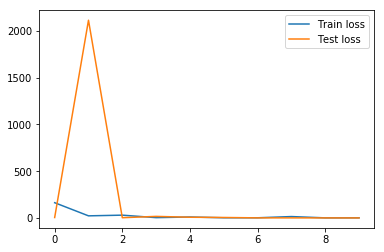

In [361]:
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='Test loss')
plt.legend();

In [362]:
ffnn_pred = model.predict(X_train_poly_df)

ffnn_pred_dict = {
    'item': [num for num in range(len(ffnn_pred))],
    'predictions': [ffnn_pred[num][0] for num in [num for num in range(len(ffnn_pred))]]
}

ffnn_pred_df = pd.DataFrame(ffnn_pred_dict)
print(ffnn_pred_df.shape)
ffnn_pred_df.head()

(5942, 2)


item  predictions
0     0     0.095289
1     1    -0.104788
2     2     0.354588
3     3    -0.007420
4     4     0.148909

In [363]:
mean_squared_error(y_train, ffnn_pred_df['predictions'])

0.15595847232749618

In [364]:
r2_score(y_train, ffnn_pred_df['predictions'])

-0.33472005287531004

In [365]:
ffnn_pred = model.predict(poly.transform(X_test))

ffnn_pred_dict = {
    'item': [num for num in range(len(ffnn_pred))],
    'predictions': [ffnn_pred[num][0] for num in [num for num in range(len(ffnn_pred))]]
}

ffnn_pred_df = pd.DataFrame(ffnn_pred_dict)
print(ffnn_pred_df.shape)
ffnn_pred_df.head()

(1981, 2)


item  predictions
0     0    -0.118483
1     1    -0.057721
2     2    -0.003220
3     3     0.072557
4     4     0.453739

In [366]:
mean_squared_error(y_test, ffnn_pred_df['predictions'])

0.13166303385796432

In [367]:
r2_score(y_test, ffnn_pred_df['predictions'])

-0.6455531647310391

In [482]:
model = Sequential()

model.add(Dense(128,
                activation='relu',
                input_shape=(120,),
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(64,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(32,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(16,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(1,
                kernel_regularizer=regularizers.l2(0.01)))

model.compile(loss='mean_squared_error', 
              optimizer='adam')

model.fit(X_train_poly_df, y_train, validation_data=(poly.transform(X_test), y_test), epochs=10, batch_size=8)

Train on 5942 samples, validate on 1981 samples
Epoch 1/10
5942/5942 [==============================] - 6s 1ms/step - loss: 275.6491 - val_loss: 13.7153
Epoch 2/10
5942/5942 [==============================] - 3s 464us/step - loss: 13.5172 - val_loss: 11.2210
Epoch 3/10
5942/5942 [==============================] - 3s 488us/step - loss: 29.4635 - val_loss: 4.8262
Epoch 4/10
5942/5942 [==============================] - 3s 466us/step - loss: 33.6741 - val_loss: 3.5455
Epoch 5/10
5942/5942 [==============================] - 3s 466us/step - loss: 8.4792 - val_loss: 3.1086
Epoch 6/10
5942/5942 [==============================] - 3s 489us/step - loss: 3.4504 - val_loss: 2.3160
Epoch 7/10
5942/5942 [==============================] - 3s 513us/step - loss: 12.8952 - val_loss: 2.6772
Epoch 8/10
5942/5942 [==============================] - 3s 512us/step - loss: 4.6896 - val_loss: 3.3987
Epoch 9/10
5942/5942 [==============================] - 3s 531us/step - loss: 3.2340 - val_loss: 1.5862
Epoch 10/1

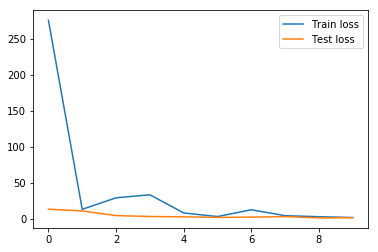

In [483]:
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='Test loss')
plt.legend();

In [484]:
ffnn_pred = model.predict(X_train_poly_df)

ffnn_pred_dict = {
    'item': [num for num in range(len(ffnn_pred))],
    'predictions': [ffnn_pred[num][0] for num in [num for num in range(len(ffnn_pred))]]
}

ffnn_pred_df = pd.DataFrame(ffnn_pred_dict)
print(ffnn_pred_df.shape)
ffnn_pred_df.head()

(5942, 2)


item  predictions
0     0    -0.288395
1     1    -0.014078
2     2     0.407560
3     3     1.071213
4     4     0.710559

In [485]:
mean_squared_error(y_train, ffnn_pred_df['predictions'])

0.5095604597866484

In [486]:
r2_score(y_train, ffnn_pred_df['predictions'])

-3.721538879151339

In [487]:
ffnn_pred = model.predict(poly.transform(X_test))

ffnn_pred_dict = {
    'item': [num for num in range(len(ffnn_pred))],
    'predictions': [ffnn_pred[num][0] for num in [num for num in range(len(ffnn_pred))]]
}

ffnn_pred_df = pd.DataFrame(ffnn_pred_dict)
print(ffnn_pred_df.shape)
ffnn_pred_df.head()

(1981, 2)


item  predictions
0     0     0.823540
1     1     0.295280
2     2     0.210594
3     3    -0.032749
4     4    -0.405081

In [488]:
mean_squared_error(y_test, ffnn_pred_df['predictions'])

0.477399368469126

In [489]:
r2_score(y_test, ffnn_pred_df['predictions'])

-5.781494205589388

In [506]:
model = Sequential()

model.add(Dense(128,
                activation='relu',
                input_shape=(120,),
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(64,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(32,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(16,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(1,
                kernel_regularizer=regularizers.l2(0.01)))

model.compile(loss='mean_squared_error', 
              optimizer='adam')

model.fit(X_train_poly_df, y_train, validation_data=(poly.transform(X_test), y_test), epochs=15, batch_size=8)

Train on 5942 samples, validate on 1981 samples
Epoch 1/15
5942/5942 [==============================] - 6s 1ms/step - loss: 243.5808 - val_loss: 6.9352
Epoch 2/15
5942/5942 [==============================] - 3s 492us/step - loss: 10.5225 - val_loss: 42.4723
Epoch 3/15
5942/5942 [==============================] - 3s 491us/step - loss: 8.0777 - val_loss: 2.5885
Epoch 4/15
5942/5942 [==============================] - 3s 481us/step - loss: 24.4448 - val_loss: 1.9427
Epoch 5/15
5942/5942 [==============================] - 3s 488us/step - loss: 1.9682 - val_loss: 1.7960
Epoch 6/15
5942/5942 [==============================] - 3s 492us/step - loss: 1.8750 - val_loss: 3.5974
Epoch 7/15
5942/5942 [==============================] - 3s 503us/step - loss: 2.0725 - val_loss: 1.6810
Epoch 8/15
5942/5942 [==============================] - 3s 519us/step - loss: 1.9055 - val_loss: 1.6617
Epoch 9/15
5942/5942 [==============================] - 3s 541us/step - loss: 3.8300 - val_loss: 1.3262
Epoch 10/15
5

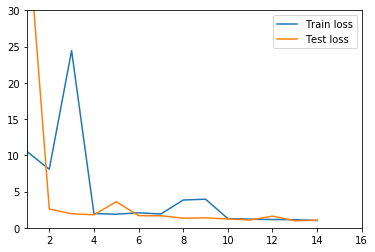

In [507]:
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='Test loss')
plt.xlim((1, 16))
plt.ylim(0, 30)
plt.legend();

In [508]:
ffnn_pred = model.predict(X_train_poly_df)

ffnn_pred_dict = {
    'item': [num for num in range(len(ffnn_pred))],
    'predictions': [ffnn_pred[num][0] for num in [num for num in range(len(ffnn_pred))]]
}

ffnn_pred_df = pd.DataFrame(ffnn_pred_dict)
print(ffnn_pred_df.shape)
ffnn_pred_df.head()

(5942, 2)


item  predictions
0     0     0.780566
1     1     0.016580
2     2     0.188610
3     3     0.261966
4     4     0.129126

In [509]:
mean_squared_error(y_train, ffnn_pred_df['predictions'])

0.25498288595654306

In [510]:
r2_score(y_train, ffnn_pred_df['predictions'])

-1.1504073253822034

In [511]:
ffnn_pred = model.predict(poly.transform(X_test))

ffnn_pred_dict = {
    'item': [num for num in range(len(ffnn_pred))],
    'predictions': [ffnn_pred[num][0] for num in [num for num in range(len(ffnn_pred))]]
}

ffnn_pred_df = pd.DataFrame(ffnn_pred_dict)
print(ffnn_pred_df.shape)
ffnn_pred_df.head()

(1981, 2)


item  predictions
0     0     0.157874
1     1     0.066224
2     2     0.306763
3     3     0.630421
4     4     0.250091

In [512]:
mean_squared_error(y_test, ffnn_pred_df['predictions'])

0.21598201918790333

In [513]:
r2_score(y_test, ffnn_pred_df['predictions'])

-1.6095388397133066

## Let's try and train a model, only using the times when it rains at both places or when it is sunny at both locations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_both_rain = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_both_rain.csv')
print(data_both_rain.shape)
print()
print(data_both_rain.columns)
print()
print(data_both_rain.isnull().sum())
print()
print(data_both_rain.dtypes)
print()
data_both_rain.head()

(1648, 19)

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

target            0
garden_didrain    0
ohare_didrain     0
tmpdiff           0
garden_prcp       0
garden_snfall     0
garden_sndpth     0
garden_maxtmp     0
garden_mintmp     0
garden_medtmp     0
garden_tobs       0
lake_temp         0
ohare_wspd        0
ohare_prcp        0
ohare_snfall      0
ohare_sndpth      0
ohare_maxtmp      0
ohare_mintmp      0
ohare_medtmp      0
dtype: int64

target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_me

target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  garden_snfall  \
0    0.09               1              1      9.5         0.11            1.5   
1    0.22               1              1      9.0         0.03            0.3   
2    0.82               1              1      4.5         0.02            0.0   
3    1.14               1              1      2.5         1.94            0.0   
4    0.63               1              1      0.0         0.18            0.8   

   garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  garden_tobs  \
0            3.0           36.0           21.0           28.5         24.0   
1            1.0           24.0            3.0           13.5         24.0   
2            0.0           48.0           32.0           40.0         33.0   
3            0.0           37.0           32.0           34.5         36.0   
4            1.0           39.0           29.0           34.0         35.0   

   lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0       5.02       16.11        0.02           0.2           1.0   
1       0.20       10.51        0.25           3.3           1.0   
2       3.63        9.40        0.84           0.0           0.0   
3       3.52       17.00        0.80           0.0           0.0   
4       3.03       19.01        0.81           2.4           1.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            27            11          19.0  
1            27            18          22.5  
2            38            33          35.5  
3            39            35          37.0  
4            36            32          34.0

In [3]:
data_no_rain = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_both_not_rain.csv')
print(data_no_rain.shape)
print()
print(data_no_rain.columns)
print()
print(data_no_rain.isnull().sum())
print()
print(data_no_rain.dtypes)
print()
data_no_rain.head()

(4022, 19)

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

target            0
garden_didrain    0
ohare_didrain     0
tmpdiff           0
garden_prcp       0
garden_snfall     0
garden_sndpth     0
garden_maxtmp     0
garden_mintmp     0
garden_medtmp     0
garden_tobs       0
lake_temp         0
ohare_wspd        0
ohare_prcp        0
ohare_snfall      0
ohare_sndpth      0
ohare_maxtmp      0
ohare_mintmp      0
ohare_medtmp      0
dtype: int64

target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_me

target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  garden_snfall  \
0     0.0               0              0      1.0          0.0            0.0   
1     0.0               0              0      7.0          0.0            0.0   
2     0.0               0              0      5.5          0.0            0.0   
3     0.0               0              0      6.5          0.0            0.0   
4     0.0               0              0      5.5          0.0            0.0   

   garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  garden_tobs  \
0            1.0           24.0            7.0           15.5         12.0   
1            1.0           25.0           10.0           17.5         11.0   
2            1.0           18.0           -1.0            8.5          1.0   
3            1.0            6.0           -1.0            2.5          3.0   
4            3.0           28.0            6.0           17.0          9.0   

   lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0       4.95       14.09         0.0           0.0           1.0   
1       0.20       12.53         0.0           0.0           1.0   
2       0.20       12.30         0.0           0.0           1.0   
3       0.20       16.33         0.0           0.0           0.0   
4       0.20        8.50         0.0           0.0           3.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            21             8          14.5  
1            18             3          10.5  
2             7            -1           3.0  
3            19            -1           9.0  
4            19             4          11.5

In [4]:
data = pd.concat([data_both_rain, data_no_rain], axis=0)
print(data.shape)
print()
print(data.columns)
print()
print(data.isnull().sum())
print()
print(data.dtypes)
print()
data.head()

(5670, 19)

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

target            0
garden_didrain    0
ohare_didrain     0
tmpdiff           0
garden_prcp       0
garden_snfall     0
garden_sndpth     0
garden_maxtmp     0
garden_mintmp     0
garden_medtmp     0
garden_tobs       0
lake_temp         0
ohare_wspd        0
ohare_prcp        0
ohare_snfall      0
ohare_sndpth      0
ohare_maxtmp      0
ohare_mintmp      0
ohare_medtmp      0
dtype: int64

target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_me

target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  garden_snfall  \
0    0.09               1              1      9.5         0.11            1.5   
1    0.22               1              1      9.0         0.03            0.3   
2    0.82               1              1      4.5         0.02            0.0   
3    1.14               1              1      2.5         1.94            0.0   
4    0.63               1              1      0.0         0.18            0.8   

   garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  garden_tobs  \
0            3.0           36.0           21.0           28.5         24.0   
1            1.0           24.0            3.0           13.5         24.0   
2            0.0           48.0           32.0           40.0         33.0   
3            0.0           37.0           32.0           34.5         36.0   
4            1.0           39.0           29.0           34.0         35.0   

   lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0       5.02       16.11        0.02           0.2           1.0   
1       0.20       10.51        0.25           3.3           1.0   
2       3.63        9.40        0.84           0.0           0.0   
3       3.52       17.00        0.80           0.0           0.0   
4       3.03       19.01        0.81           2.4           1.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            27            11          19.0  
1            27            18          22.5  
2            38            33          35.5  
3            39            35          37.0  
4            36            32          34.0

In [5]:
data.drop(columns=['garden_didrain', 'ohare_didrain', 'garden_prcp', 'ohare_prcp'], inplace=True)

In [6]:
X = data.drop(columns='target')
y = data['target']

In [7]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# build polynomial features
poly = PolynomialFeatures()
X_train_poly_array = poly.fit_transform(X_train)

In [9]:
forest = RandomForestRegressor(n_estimators=100,
                               max_features='sqrt')

forest.fit(X_train_poly_array, y_train)

pred = forest.predict(X_train_poly_array)
print("MSE on predictions:")
print(f"training: {mean_squared_error(y_train, pred)}.")
prediction = forest.predict(poly.transform(X_test))
print(f"testing: {mean_squared_error(y_test, prediction)}.")
print()
print("R-squared score")
print(f"training: {forest.score(X_train_poly_array, y_train)}.")
print(f"testing: {forest.score(poly.transform(X_test), y_test)}.")
print()
print("cross validation score")
print(f"{cross_val_score(forest, X_train_poly_array, y_train, cv=3).mean()}")

MSE on predictions:
training: 0.010372578238476014.
testing: 0.08676634925246826.

R-squared score
training: 0.8714780285933628.
testing: 0.1317100684031023.

cross validation score
0.09862939991552351


In [10]:
data_no_rain['lake_temp'].mean()*9/5 +32

50.270899552461486

In [11]:
data_both_rain['lake_temp'].mean()*9/5 +32

47.846902912621374

In [12]:
correlated = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_correlated_but_clean.csv')
print(correlated.shape)
print()
print(correlated.columns)
print()
print(correlated.isnull().sum())
print()
print(correlated.dtypes)
print()
correlated.head()

(7923, 20)

Index(['DATE', 'target', 'garden_didrain', 'ohare_didrain', 'tmpdiff',
       'garden_prcp', 'garden_snfall', 'garden_sndpth', 'garden_maxtmp',
       'garden_mintmp', 'garden_medtmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_medtmp'],
      dtype='object')

DATE              0
target            0
garden_didrain    0
ohare_didrain     0
tmpdiff           0
garden_prcp       0
garden_snfall     0
garden_sndpth     0
garden_maxtmp     0
garden_mintmp     0
garden_medtmp     0
garden_tobs       0
lake_temp         0
ohare_wspd        0
ohare_prcp        0
ohare_snfall      0
ohare_sndpth      0
ohare_maxtmp      0
ohare_mintmp      0
ohare_medtmp      0
dtype: int64

DATE               object
target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_

DATE  target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  \
0  1995-01-01    0.09               1              1      9.5         0.11   
1  1995-01-02    0.00               0              0      1.0         0.00   
2  1995-01-03    0.00               0              0      7.0         0.00   
3  1995-01-04    0.00               0              0      5.5         0.00   
4  1995-01-05    0.00               0              0      6.5         0.00   

   garden_snfall  garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  \
0            1.5            3.0           36.0           21.0           28.5   
1            0.0            1.0           24.0            7.0           15.5   
2            0.0            1.0           25.0           10.0           17.5   
3            0.0            1.0           18.0           -1.0            8.5   
4            0.0            1.0            6.0           -1.0            2.5   

   garden_tobs  lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0         24.0       5.02       16.11        0.02           0.2           1.0   
1         12.0       4.95       14.09        0.00           0.0           1.0   
2         11.0       0.20       12.53        0.00           0.0           1.0   
3          1.0       0.20       12.30        0.00           0.0           1.0   
4          3.0       0.20       16.33        0.00           0.0           0.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            27            11          19.0  
1            21             8          14.5  
2            18             3          10.5  
3             7            -1           3.0  
4            19            -1           9.0

In [13]:
similar_weather = correlated[correlated['ohare_didrain'] == correlated['garden_didrain']]
print(similar_weather.shape)
print()
print(similar_weather.columns)
print()
print(similar_weather.isnull().sum())
print()
print(similar_weather.dtypes)
print()
similar_weather.head()

(5670, 20)

Index(['DATE', 'target', 'garden_didrain', 'ohare_didrain', 'tmpdiff',
       'garden_prcp', 'garden_snfall', 'garden_sndpth', 'garden_maxtmp',
       'garden_mintmp', 'garden_medtmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_medtmp'],
      dtype='object')

DATE              0
target            0
garden_didrain    0
ohare_didrain     0
tmpdiff           0
garden_prcp       0
garden_snfall     0
garden_sndpth     0
garden_maxtmp     0
garden_mintmp     0
garden_medtmp     0
garden_tobs       0
lake_temp         0
ohare_wspd        0
ohare_prcp        0
ohare_snfall      0
ohare_sndpth      0
ohare_maxtmp      0
ohare_mintmp      0
ohare_medtmp      0
dtype: int64

DATE               object
target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_

DATE  target  garden_didrain  ohare_didrain  tmpdiff  garden_prcp  \
0  1995-01-01    0.09               1              1      9.5         0.11   
1  1995-01-02    0.00               0              0      1.0         0.00   
2  1995-01-03    0.00               0              0      7.0         0.00   
3  1995-01-04    0.00               0              0      5.5         0.00   
4  1995-01-05    0.00               0              0      6.5         0.00   

   garden_snfall  garden_sndpth  garden_maxtmp  garden_mintmp  garden_medtmp  \
0            1.5            3.0           36.0           21.0           28.5   
1            0.0            1.0           24.0            7.0           15.5   
2            0.0            1.0           25.0           10.0           17.5   
3            0.0            1.0           18.0           -1.0            8.5   
4            0.0            1.0            6.0           -1.0            2.5   

   garden_tobs  lake_temp  ohare_wspd  ohare_prcp  ohare_snfall  ohare_sndpth  \
0         24.0       5.02       16.11        0.02           0.2           1.0   
1         12.0       4.95       14.09        0.00           0.0           1.0   
2         11.0       0.20       12.53        0.00           0.0           1.0   
3          1.0       0.20       12.30        0.00           0.0           1.0   
4          3.0       0.20       16.33        0.00           0.0           0.0   

   ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0            27            11          19.0  
1            21             8          14.5  
2            18             3          10.5  
3             7            -1           3.0  
4            19            -1           9.0

In [19]:
similar = similar_weather.drop(columns=['garden_didrain', 'ohare_didrain', 'garden_prcp', 'ohare_prcp', 'DATE'], axis=1)
print(similar.shape)
print()
similar.head()

(5670, 15)



target  tmpdiff  garden_snfall  garden_sndpth  garden_maxtmp  \
0    0.09      9.5            1.5            3.0           36.0   
1    0.00      1.0            0.0            1.0           24.0   
2    0.00      7.0            0.0            1.0           25.0   
3    0.00      5.5            0.0            1.0           18.0   
4    0.00      6.5            0.0            1.0            6.0   

   garden_mintmp  garden_medtmp  garden_tobs  lake_temp  ohare_wspd  \
0           21.0           28.5         24.0       5.02       16.11   
1            7.0           15.5         12.0       4.95       14.09   
2           10.0           17.5         11.0       0.20       12.53   
3           -1.0            8.5          1.0       0.20       12.30   
4           -1.0            2.5          3.0       0.20       16.33   

   ohare_snfall  ohare_sndpth  ohare_maxtmp  ohare_mintmp  ohare_medtmp  
0           0.2           1.0            27            11          19.0  
1           0.0           1.0            21             8          14.5  
2           0.0           1.0            18             3          10.5  
3           0.0           1.0             7            -1           3.0  
4           0.0           0.0            19            -1           9.0

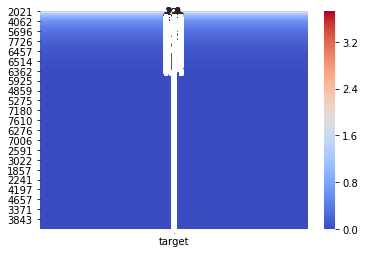

In [20]:
corr = similar.corr()
corr_sort = similar.sort_values(by = ['target'], axis = 0, ascending=False)
corr_sort
sns.heatmap(corr_sort[['target']], annot=True, cmap='coolwarm');

<a id='modelAnalysis'></a>
## Analysis of the model results

In [29]:
modeling_results = pd.read_csv('data/modeling_results.csv')
print(modeling_results.shape)
print()
print(modeling_results.columns)
modeling_results.drop(axis=1, columns='View' , inplace=True)
print()
print(modeling_results.dtypes)
modeling_results

(14, 7)

Index(['Model', 'Training score', 'Testing score', 'Training MSE',
       'Testing MSE', 'cross validation', 'View'],
      dtype='object')

Model                object
Training score      float64
Testing score       float64
Training MSE        float64
Testing MSE         float64
cross validation    float64
dtype: object


Model  Training score  Testing score  Training MSE  \
0       Linear no poly           0.0825         0.1052        0.0933   
1            Linear gs           0.1222         0.1329        0.0893   
2        Decision Tree           0.1139         0.0691        0.0901   
3     Decision Tree gs           0.0937         0.0584        0.0922   
4        Random Forest           0.8614         0.0517        0.0134   
5        Random Forest           0.8711         0.1078        0.0131   
6     Random Forest gs           0.8658         0.0905        0.0136   
7        Random Forest           0.8677         0.0682        0.0135   
8        Random Forest           0.8704         0.1153        0.0132   
9        Random Forest           0.8080         0.0957        0.0195   
10   Random Forest ada           0.9547         0.0549        0.0331   
11   Random Forest ada           0.9445         0.0525        0.0056   
12   Random Forest bag           0.6735         0.1130        0.0332   
13   Random Forest bag           0.6705         0.1239        0.0335   

    Testing MSE  cross validation  
0        0.0683            0.0785  
1        0.0662            0.0984  
2        0.0711            0.0429  
3        0.0719            0.0450  
4        0.0724            0.0554  
5        0.0681            0.0770  
6        0.0694            0.0651  
7        0.0711            0.0660  
8        0.0676            0.0767  
9        0.0690            0.0787  
10       0.0722            0.0331  
11       0.0723            0.0283  
12       0.0677            0.0928  
13       0.0669            0.0943

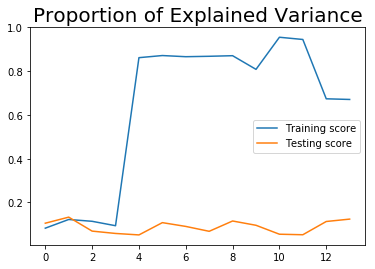

In [45]:
plt.plot(modeling_results['Training score'])
plt.plot(modeling_results['Testing score']);
plt.legend();
plt.title('Proportion of Explained Variance', size=20);
# locs = ax.set_xticks(ticks=modeling_results['Model'])
# plt.xticks(ticks=locs, labels=modeling_results['Model'])

<a id='testAnalysis'></a>
## Analysis of the testing results

In [7]:
testing_results = pd.read_csv('data/testing_results.csv')
print(testing_results.shape)
print()
print(testing_results.columns)
print()
print(testing_results.dtypes)
testing_results

(5, 7)

Index(['Data', 'Quantity of Data', 't-score', 'p-value', 'significance',
       'Gardens Avg (F)', 'Ohare Avg (F)'],
      dtype='object')

Data                 object
Quantity of Data      int64
t-score             float64
p-value             float64
significance         object
Gardens Avg (F)     float64
Ohare Avg (F)       float64
dtype: object


Data  Quantity of Data  t-score  p-value significance  \
0      All Data               7923   0.5876   0.5568        None    
1       No Rain               4022   3.2850   0.0010         Yes    
2     Both Rain               1648  -2.6290   0.0086         Yes    
3     ohareRain               1193  -1.9557   0.0506        None    
4   gardensRain               1060   0.0904   0.9280        None    

   Gardens Avg (F)  Ohare Avg (F)  
0            59.24          59.43  
1            58.99          60.57  
2            59.48          57.70  
3            59.06          57.43  
4            59.99          60.07